# Feature Selection

In [127]:
# Extração de variáveis com testes estatísticos univariados (Teste qui-quadrado)
from sklearn.feature_selection import chi2
f_score = chi2(X_train, y_train)
f_score

(array([3.85183231e+01, 4.05081298e+00, 1.38833303e-01, 1.67923261e+01,
        2.83759282e+03, 6.96587750e+01, 3.63586973e+01, 1.33271046e+01,
        9.20626119e-02, 4.24535647e+00]),
 array([5.42420385e-10, 4.41500780e-02, 7.09443633e-01, 4.17016019e-05,
        0.00000000e+00, 7.05043794e-17, 1.64145085e-09, 2.61597140e-04,
        7.61571168e-01, 3.93578063e-02]))

In [128]:
# Listando o P-values por variável
p_values = pd.Series(f_score[1])
p_values.index = X_train.columns
p_values.sort_values(ascending = True)

Fare                       0.000000e+00
Sex_male                   7.050438e-17
Pclass                     5.424204e-10
Cabin_D%,%E%,%F%,%G%,%T    1.641451e-09
Parch                      4.170160e-05
Cabin_Missing              2.615971e-04
Embarked_S                 3.935781e-02
Age                        4.415008e-02
SibSp                      7.094436e-01
Embarked_Q                 7.615712e-01
dtype: float64

## Lasso regularisation using SelectFromModel

In [129]:
sel_ = SelectFromModel(LogisticRegression(C=1, penalty='l1',solver='liblinear'))
sel_.fit(X_train, y_train)

SelectFromModel(estimator=LogisticRegression(C=1, penalty='l1',
                                             solver='liblinear'))

In [130]:
sel_.get_support()

array([ True,  True,  True, False,  True,  True,  True, False,  True,
        True])

In [131]:
selected_feat = X_train.columns[(sel_.get_support())]
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
      np.sum(sel_.estimator_.coef_ == 0)))

total features: 10
selected features: 8
features with coefficients shrank to zero: 2


In [132]:
removed_feats = X_train.columns[(sel_.estimator_.coef_ == 0).ravel().tolist()]
removed_feats

Index(['Parch', 'Cabin_Missing'], dtype='object')

In [133]:
X_train_selected = sel_.transform(X_train.fillna(0))
X_test_selected = sel_.transform(X_test.fillna(0))
X_train_selected.shape, X_test_selected.shape

((623, 8), (268, 8))

# Lasso

In [134]:
X_train.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male',
       'Cabin_D%,%E%,%F%,%G%,%T', 'Cabin_Missing', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [135]:
#import libraries
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import SelectFromModel
#Fit the model
clf = LassoCV().fit(X_train, y_train)
#Selected features
importance = np.abs(clf.coef_)
importance
#idx_third = importance.argsort()[-3]
#threshold = importance[idx_third] + 0.01
#idx_features = (-importance).argsort()[:10]
#name_features = np.array(feature_names)[idx_features]
#print('Selected features: {}'.format(name_features))


array([1.20443250e-01, 7.73637007e-02, 3.32643987e-02, 0.00000000e+00,
       3.23449351e-04, 4.95441150e-01, 1.42947197e-01, 0.00000000e+00,
       0.00000000e+00, 6.00315915e-02])

In [136]:
len(importance)

10

## Statsmodels

In [ ]:
train_ml.drop(columns='Survived')

In [ ]:
import statsmodels.api as sm
X_new = sm.add_constant(train_ml.drop(columns='Survived'))
X_new

In [ ]:
model = sm.OLS(train_ml[['Survived']], X_new).fit()
model.pvalues

## RFECV

## RFECV - Random Forest

Optimal number of features : 10


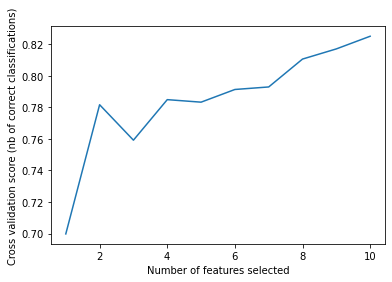

In [39]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier

# Create the RFE object and compute a cross-validated score.
#svc = LogisticRegression(max_iter=500)
svc = RandomForestClassifier(n_estimators=100)
#svc = SVC(kernel="linear")
# The "accuracy" scoring is proportional to the number of correct
# classifications

min_features_to_select = 1  # Minimum number of features to consider
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2),
              scoring='accuracy',
              min_features_to_select=min_features_to_select)
rfecv.fit(X_train, y_train)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(min_features_to_select,
               len(rfecv.grid_scores_) + min_features_to_select),
         rfecv.grid_scores_)
plt.show()

In [40]:
print(rfecv.support_)
print(rfecv.ranking_)
f = rfecv.get_support(1) #the most important features
names = X_train.columns[f] # final features`
names

[ True  True  True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1]


Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male',
       'Cabin_D%,%E%,%F%,%G%,%T', 'Cabin_Missing', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [41]:
rfecv.grid_scores_.max()

0.8250422541017396

## Feature Importance - Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, max_features='sqrt')
clf = clf.fit(X_train, y_train)

In [43]:
features = pd.DataFrame()
features['feature'] = X_train.columns
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

<AxesSubplot:ylabel='feature'>

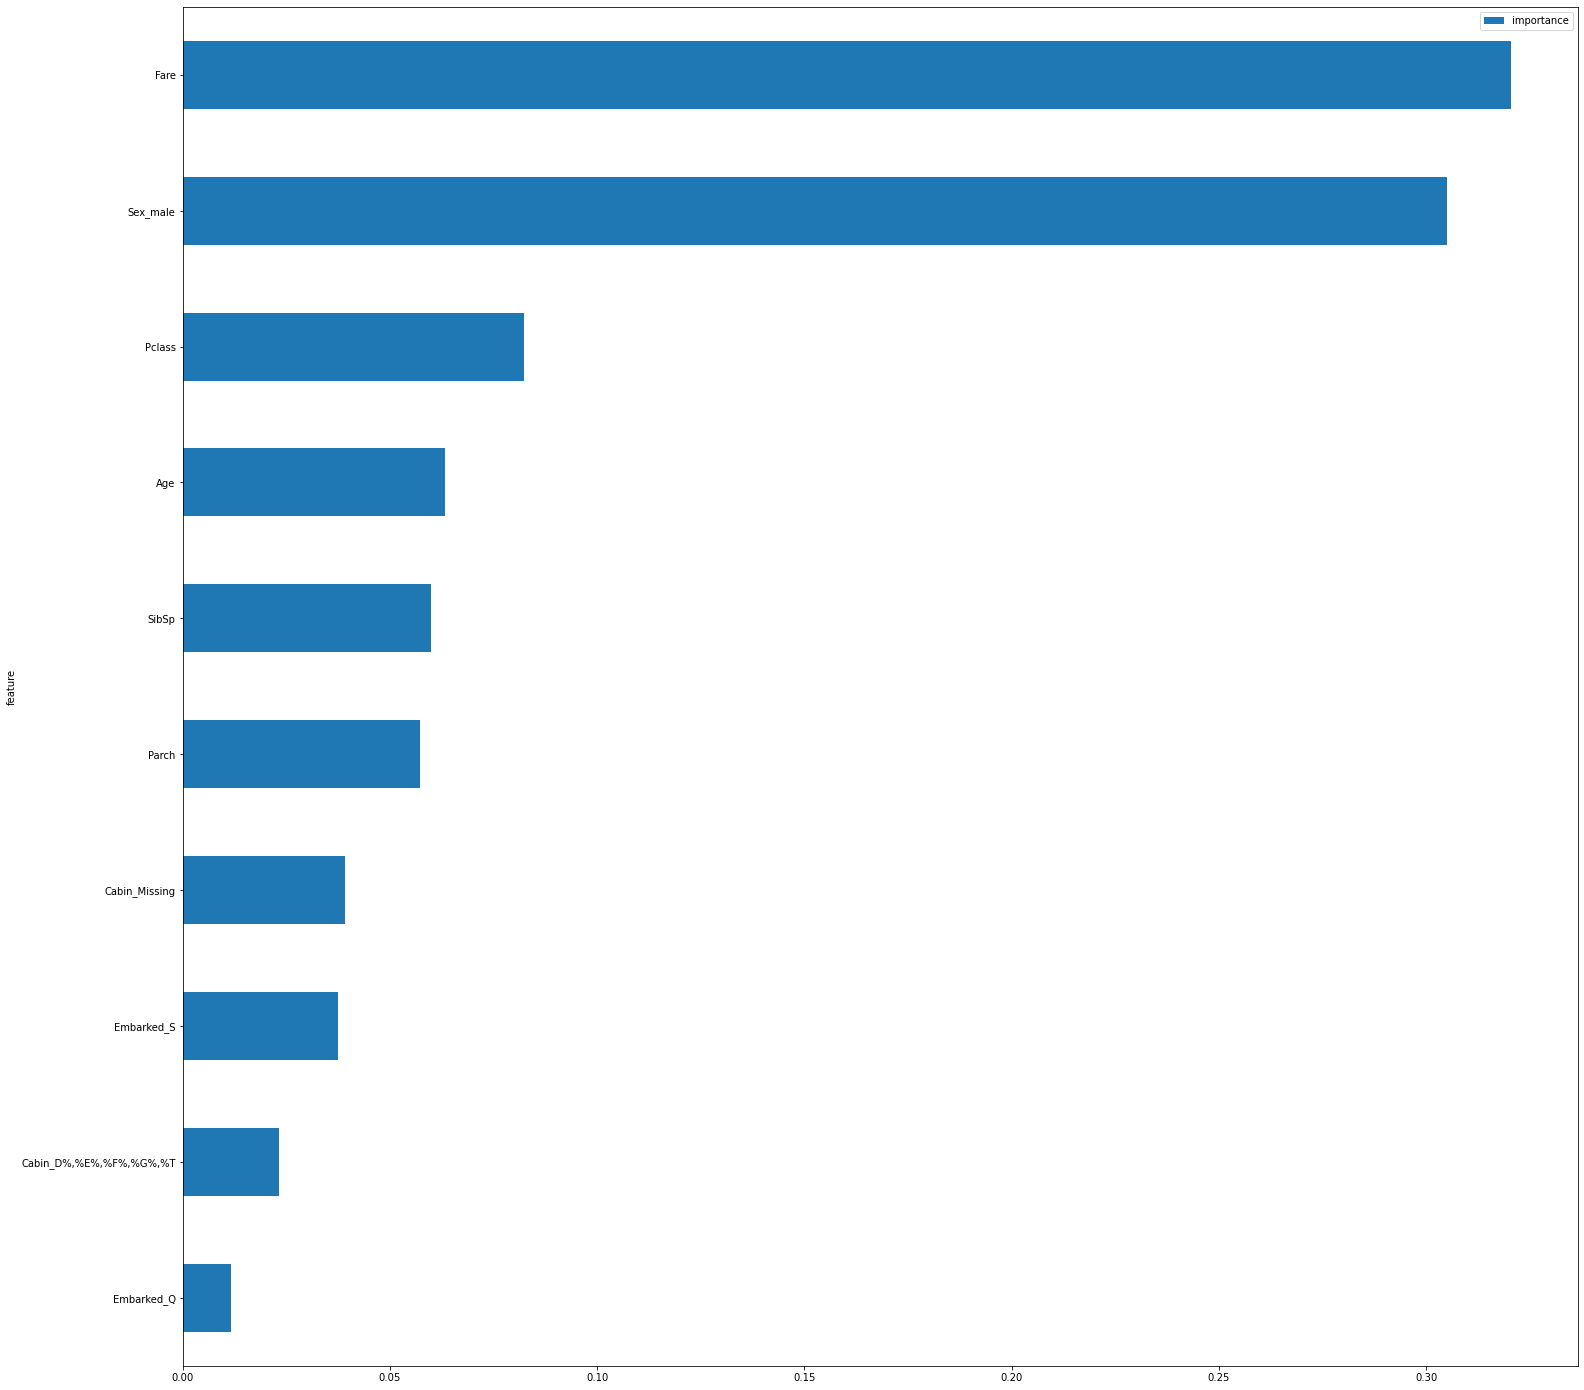

In [44]:
features.plot(kind='barh', figsize=(25, 25))

In [137]:
from sklearn.feature_selection import RFECV
logreg_model = LogisticRegression()
rfecv = RFECV(estimator=logreg_model, step=1, cv=strat_k_fold, scoring='accuracy')
rfecv.fit(X, y)

NameError: name 'strat_k_fold' is not defined

In [ ]:
plt.figure()
plt.title('Logistic Regression CV score vs No of Features')
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [ ]:
feature_importance = list(zip(feature_names, rfecv.support_))
new_features = []
for key,value in enumerate(feature_importance):
    if(value[1]) == True:
        new_features.append(value[0])
        
print(new_features)

In [ ]:
# Calculate accuracy scores 
X_new = diabetes_mod[new_features]
initial_score = cross_val_score(logreg_model, X, y, cv=strat_k_fold, scoring='accuracy').mean()
print("Initial accuracy : {} ".format(initial_score))
fe_score = cross_val_score(logreg_model, X_new, y, cv=strat_k_fold, scoring='accuracy').mean()
print("Accuracy after Feature Selection : {} ".format(fe_score))

C:\Users\joaom\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
C:\Users\joaom\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
C:\Users\joaom\anaconda3\lib\site-packages\skl

Optimal number of features : 6


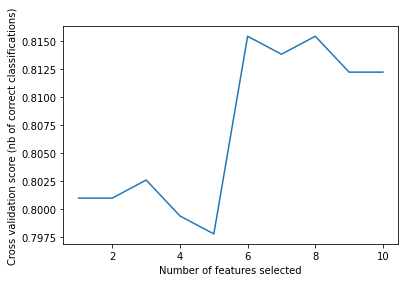

In [138]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

# Create the RFE object and compute a cross-validated score.
svc = LogisticRegression()
#svc = SVC(kernel="linear")
# The "accuracy" scoring is proportional to the number of correct
# classifications

min_features_to_select = 1  # Minimum number of features to consider
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2),
              scoring='accuracy',
              min_features_to_select=min_features_to_select)
rfecv.fit(X_train, y_train)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(min_features_to_select,
               len(rfecv.grid_scores_) + min_features_to_select),
         rfecv.grid_scores_)
plt.show()

In [139]:
print(rfecv.support_)
print(rfecv.ranking_)
f = rfecv.get_support(1) #the most important features
names = X_train.columns[f] # final features`
names

[ True  True  True False False  True  True False False  True]
[1 1 1 4 5 1 1 3 2 1]


Index(['Pclass', 'Age', 'SibSp', 'Sex_male', 'Cabin_D%,%E%,%F%,%G%,%T',
       'Embarked_S'],
      dtype='object')

In [140]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, max_features='sqrt')
clf = clf.fit(X_train, y_train)

In [141]:
features = pd.DataFrame()
features['feature'] = X_train.columns
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

<AxesSubplot:ylabel='feature'>

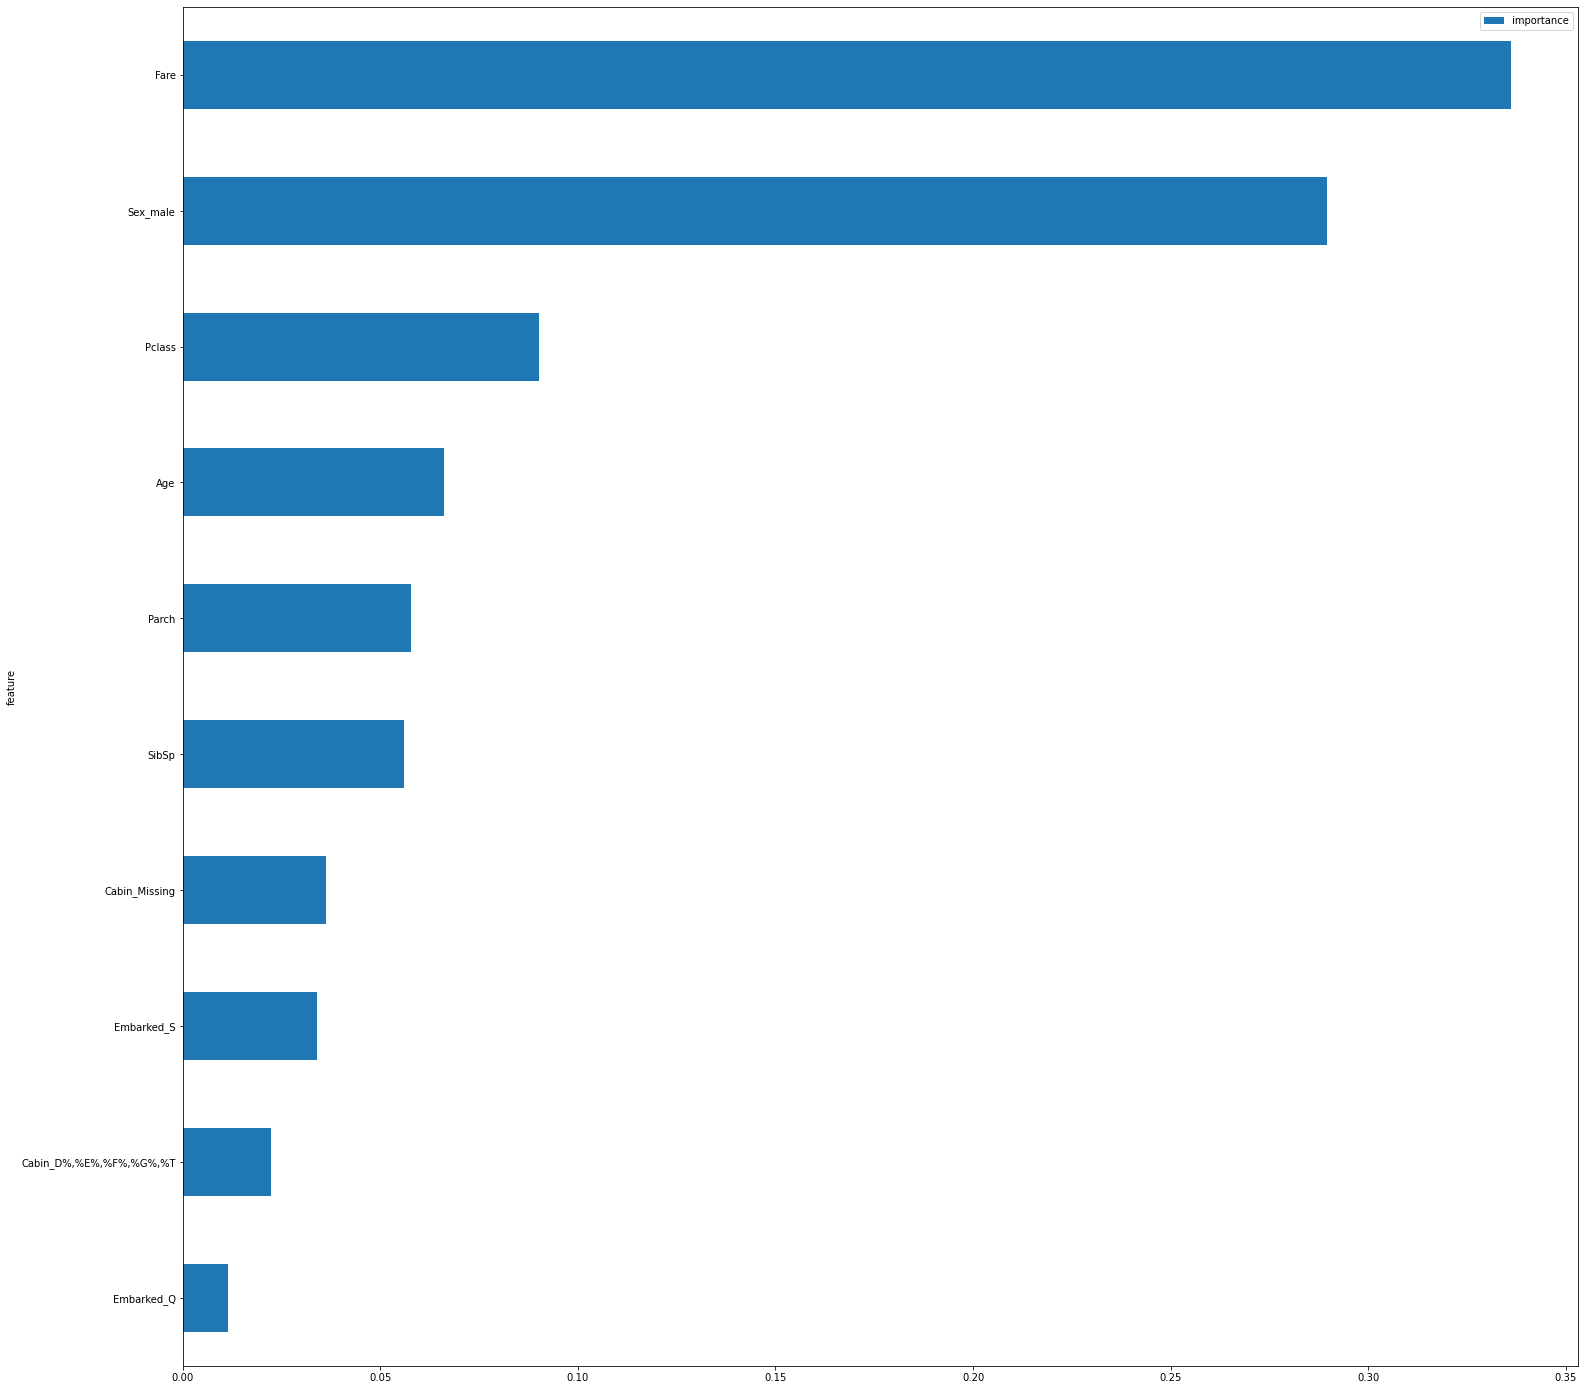

In [142]:
features.plot(kind='barh', figsize=(25, 25))